# Лабораторная работа №2 по курсу "Интеллектуальный анализ данных".

Лабораторная работа №2 "Визуализация данных".<br>
Выполнил студент группы 6133-010402 Мелешенко Иван.

# [**Задание на лабораторную работу.**](https://github.com/kvvik/DS_SamU/blob/main/tasks/lab_2_visual_groupNumber_SecondName.ipynb)

## ***Задание 1.***<br>Считать в pandas DataFrame любой источник данных.<br>Произвести описание и визуальный анализ данных. 

В качестве источников данных могут выступать:
* CSV;
* JSON;
* Excel-файл;
* HTML-таблицу;
* встроенный датасет sklearn.

---

## ***Задание 2.***<br>Построить графики используя Matplotlib.<br>Каждый график необходимо снабдить комментарием. 

+ Matplotlib
    * Построить любой график (любого рода) с помощью чистого matplotlib / pylab
    * Построить несколько суб-графиков на одном графике используя .subplot.

Графики должны быть разных типов и хотя бы два из них должны быть связаны с вашим датасетом. Хотя бы в одном графике подпишите оси. Во всех графиках подписать название графика.

---

## ***Задание 3.***<br>Построить графики используя pandas.DataFrame.plot / Series.plot (мануал).<br>

Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой). Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

---


## ***Задание 4.***<br>Построить графики используя Seaborn.<br>

+ Seaborn 
    * Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных
    * Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных
    * Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального
    * Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)

---

## ***Задание 5.***<br> Построить QQ-график (и гистограмму).<br>
Данное посторение производится для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

---
## ***Задание 6.***<br> Построить любой график с помощью plotly.<br>

# Выполнение заданий лабораторной работы

## Этап 0. Загрузка библиотек. Подключение Google Drive.

Подключим необхоимые для работы библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("darkgrid")
from scipy.stats import probplot
import warnings
import sys  
if not sys.warnoptions:
    warnings.simplefilter("ignore")

Смонтируем образ Google диска для ускоренной и упрощенной загрузки файл в программу.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Этап 1. Загрузка и обработка данных.

### Произведем непосредственно загрузку данных.

В своей работе я использовал следующий [набор данных](https://www.kaggle.com/preetviradiya/imdb-movies-ratings-details):

In [3]:
imdb_data = pd.read_csv('/content/drive/MyDrive/datasets/IMDB_movie_reviews_details.csv')

### Посмотрим на сам DataSet.

In [4]:
imdb_data

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
2,2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...","78,266",NaN
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M
...,...,...,...,...,...,...,...,...,...,...
995,995,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,76.0,A young New York socialite becomes interested ...,"169,575",NaN
996,996,Giant,1956,201,"Drama, Western",7.6,84.0,Sprawling epic covering the life of a Texas ca...,"34,759",NaN
997,997,Shane,1953,118,"Drama, Western",7.6,80.0,A weary gunfighter attempts to settle down wit...,"37,753",$20.00M
998,998,From Here to Eternity,1953,118,"Drama, Romance, War",7.6,85.0,"In Hawaii in 1941, a private is cruelly punish...","44,086",$30.50M


### Обработка данных

In [5]:
imdb_data["year"] = [str(x).replace('I','') for x in imdb_data["year"]]
imdb_data["year"] = [int(x) for x in imdb_data["year"]]
imdb_data["votes"] = [str(x).replace(',','') for x in imdb_data["votes"]]
imdb_data["votes"] = [int(x) for x in imdb_data["votes"]]
imdb_data["Generation"] = imdb_data.apply(lambda x: "New" if x["year"] > 1999 else "Old", axis=1)

### Переиндексация набора данных.

In [6]:
imdb_data.rename(columns = {'Unnamed: 0' : 'Rank'}, inplace = True)
imdb_data.set_index('Rank')

,name,year,runtime,genre,rating,metascore,timeline,votes,gross,Generation
Rank,,,,,,,,,,
0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,2394059,$28.34M,Old
1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,1658439,$134.97M,Old
2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...",78266,NaN,New
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,2355907,$534.86M,New
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,1152912,$57.30M,Old
...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,76.0,A young New York socialite becomes interested ...,169575,NaN,Old
996,Giant,1956,201,"Drama, Western",7.6,84.0,Sprawling epic covering the life of a Texas ca...,34759,NaN,Old
997,Shane,1953,118,"Drama, Western",7.6,80.0,A weary gunfighter attempts to settle down wit...,37753,$20.00M,Old


### Описание данных.

Описание полей датасета:
- Name - Название фильма
- Year - Год, когда этот фильм был выпущен.
- Runtime - общее время просмотра фильма.
- Genre - Жанр фильма
- Rating - Рейтинг фильма на сайте IMDB
- Timeline - мини-рассказ / резюме
- Meta_score - Оценка фильма пользователями
- Votes - Общее количество голосов
- Gross - Деньги, заработанные этим фильмом.

## Этап 2. Построение графиков с использованием Matplotlib.


* Построить любой график (любого рода) с помощью чистого matplotlib / pylab
* Построить несколько суб-графиков на одном графике используя .subplot.

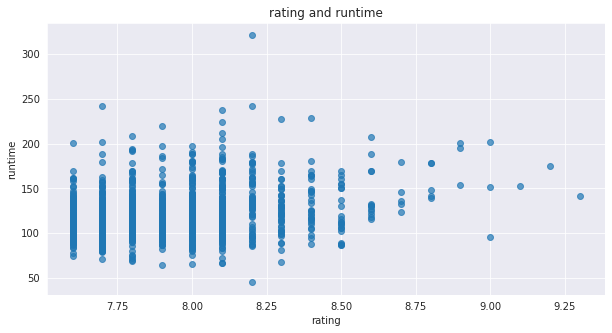

In [7]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(imdb_data.rating, 
           imdb_data.runtime,
           color='#1f77b4',
           alpha=0.7
        )
ax.set(title='rating and runtime', xlabel='rating', ylabel='runtime')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  if __name__ == '__main__':


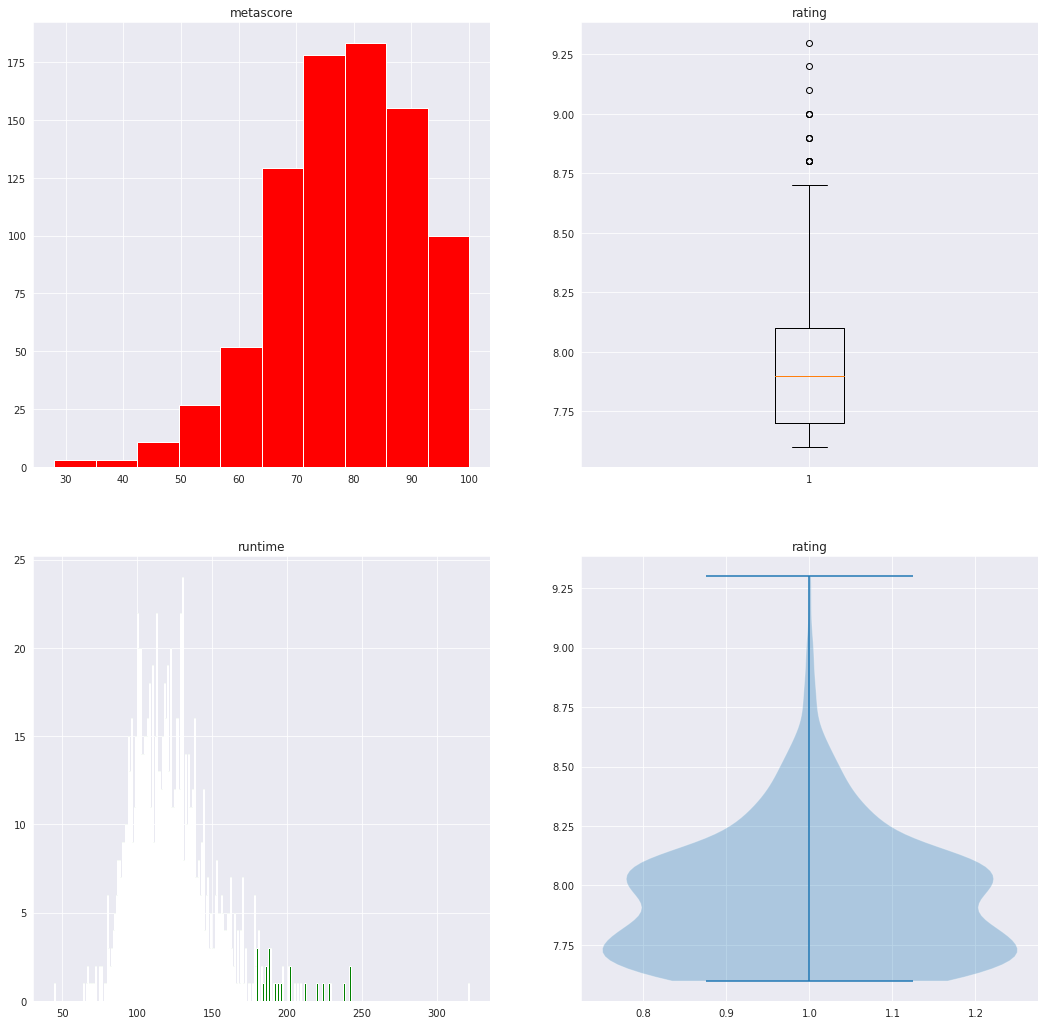

In [8]:
fig, ax = plt.subplots(2,2, figsize=(18, 18))

ax[0,0].hist(imdb_data.metascore, color="R")
ax[0,0].set(title = "metascore")

ax[0, 1].boxplot(imdb_data.rating)
ax[0, 1].set(title ="rating")

ax[1,0].bar(imdb_data.runtime.value_counts().index, imdb_data.runtime.value_counts().values, color="G")
ax[1,0].set(title ="runtime")

ax[1, 1].violinplot(imdb_data.rating)
ax[1, 1].set(title ="rating")

plt.show()

## Этап 3. Построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by.

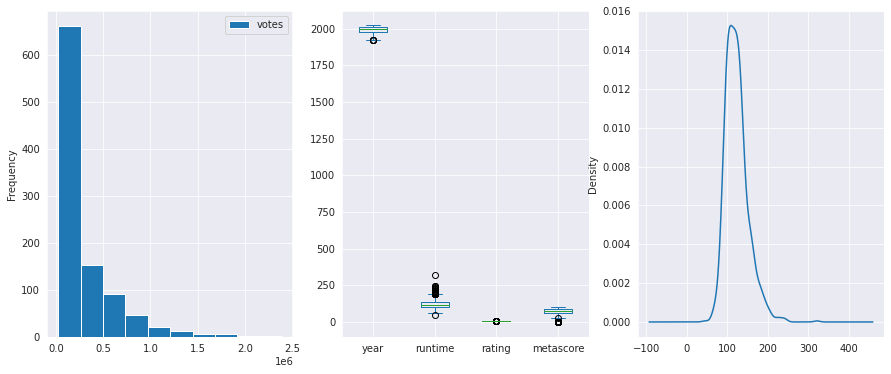

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

imdb_data.plot(y='votes', kind='hist', ax=ax1)
imdb_data.fillna(0).plot(y=[2, 3, 5, 6], kind='box', ax=ax2)
imdb_data['runtime'].plot.kde(y='runtime', ax=ax3)

## Этап 4. Построить графики с использованием Seaborn

#### 4.1 Построить .pairplot с помощью seaborn на каком-либо наборе данных

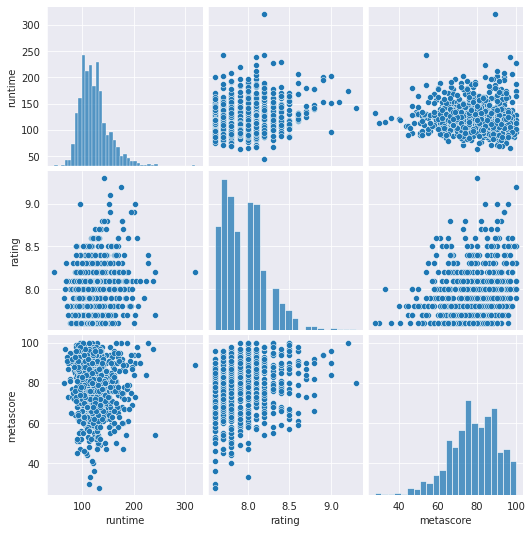

In [10]:
sns.pairplot(imdb_data[['runtime', 'rating', 'metascore']])
plt.show()

#### 4.2 Построить .jointplot

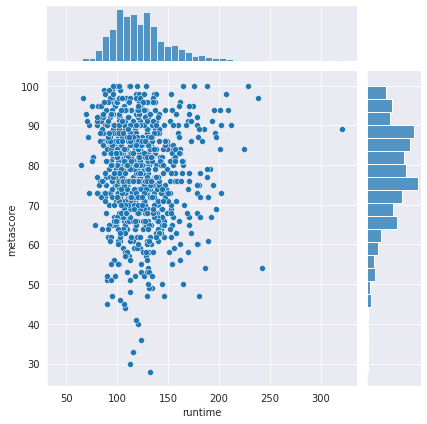

In [11]:
sns.jointplot(x='runtime', y='metascore', data=imdb_data)

#### 4.3 Построить .boxplot или .violinplot на каком-либо наборе данных

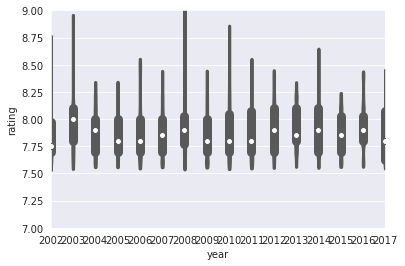

In [12]:
imdb_data1 = imdb_data.sort_values(by=['year'])
imdb_data1.head(2)
sns.violinplot(data=imdb_data1, 
               palette="Set2", 
               x='year',
               y='rating',
               bw=0.2, 
               cut=1, 
               linewidth=3).set(xlim=(80, 95),ylim=(7,9))
plt.show()

#### 4.4 Построить график heatmap попарной корреляции всех числовых признаков

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


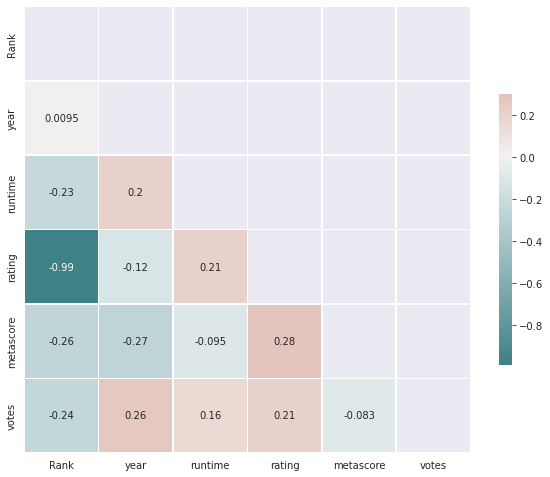

In [13]:
corr = imdb_data.drop(['name', 'genre', 'gross'], axis=1).corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(200, 21, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

## Этап 5. Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


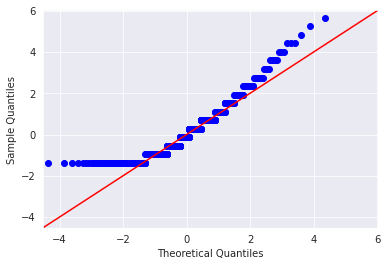

In [14]:
import statsmodels.api as sm
from scipy import stats

fig = sm.qqplot(imdb_data['rating'], stats.t, fit=True, line="45")

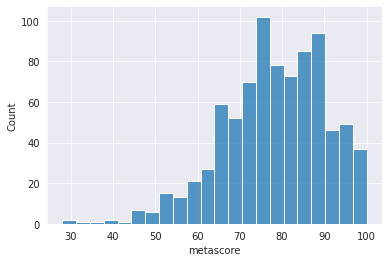

In [15]:
sns.histplot(imdb_data['metascore'])
plt.show()

## Этап 6. Построить любой график (связанный с вашими данными) с помощью plotly

In [16]:
import plotly.express as px
px.scatter_matrix(imdb_data[["year", "rating", "runtime", "metascore"]])